In [2]:
import pandas as pd

df = pd.read_csv("/content/welddb_cleaned(1)")
df.head()


,Carbon concentration (weight \%),Silicon concentration (weight \%),Manganese concentration (weight \%),Sulphur concentration (weight \%),Phosphorus concentration (weight \%),Nickel concentration (weight \%),Chromium concentration (weight \%),Molybdenum concentration (weight \%),Vanadium concentration (weight \%),Copper concentration (weight \%),...,"Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._GMAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._GTAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._MMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._NGGMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._NGSAW","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._SA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._SAA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._ShMA","Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc._TSA",Puissance (W)
0,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
1,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
2,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
3,0.037,0.31,1.03,0.007,0.014,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
4,0.037,0.31,1.03,0.007,0.014,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,3570.0


In [3]:
print(df.shape)
print(df.columns.tolist())


(1652, 52)
['Carbon concentration (weight \\%)', 'Silicon concentration (weight \\%)', 'Manganese concentration (weight \\%)', 'Sulphur concentration (weight \\%)', 'Phosphorus concentration (weight \\%)', 'Nickel concentration (weight \\%)', 'Chromium concentration (weight \\%)', 'Molybdenum concentration (weight \\%)', 'Vanadium concentration (weight \\%)', 'Copper concentration (weight \\%)', 'Cobalt concentration (weight \\%)', 'Tungsten concentration (weight \\%)', 'Oxygen concentration (parts per million by weight)', 'Titanium concentration (parts per million by weight)', 'Nitrogen concentration (parts per million by weight)', 'Aluminium concentration (parts per million by weight)', 'Boron concentration (parts per million by weight)', 'Niobium concentration (parts per million by weight)', 'Tin concentration (parts per million by weight)', 'Arsenic concentration (parts per million by weight)', 'Antimony concentration (parts per million by weight)', 'Heat input (kJ mm$^{-1}$)', 'In

In [4]:
df.isnull().sum().sort_values(ascending=False)


,0
50 \% FATT,1621
Martensite (\%),1563
Ferrite with carbide aggreagate (\%),1563
Ferrite with second phase (\%),1562
Acicular ferrite (\%),1562
Primary ferrite in microstructure (\%),1554
Hardness (kg mm$^{-2}$),1530
Elongation (\%),952
Reduction of Area (\%),947
Ultimate tensile strength (MPa),914


**Prédiction de la résistance à la limite d’élasticité (Yield Strength) selon une formule physique**

Dans cette étape, nous allons prédire la résistance à la limite d’élasticité du métal soudé à partir de ses caractéristiques chimiques et thermiques, en appliquant une formule physique issue d’une étude scientifique sur les aciers inoxydables austénitiques.

La prédiction repose sur la corrélation entre la composition chimique et l’apport thermique du soudage, selon l’équation suivante :

Yield Strength (MPa)=314+352C+2.96Cr+24.97Mo+472Cu−3.37×Heat Input
Yield Strength (MPa)=314+352C+2.96Cr+24.97Mo+472Cu−3.37×Heat Input

où :

C,Cr,Mo,Cu
C,Cr,Mo,Cu représentent les teneurs respectives en carbone, chrome, molybdène et cuivre (en % masse),

Heat Input correspond à l’énergie thermique appliquée pendant le soudage (en kJ/mm).

In [5]:
df['Yield strength (physique)'] = (
    314
    + 352 * df['Carbon concentration (weight \\%)']
    + 2.96 * df['Chromium concentration (weight \\%)']
    + 24.97 * df['Molybdenum concentration (weight \\%)']
    + 472 * df['Copper concentration (weight \\%)']
    - 3.37 * df['Heat input (kJ mm$^{-1}$)']
)


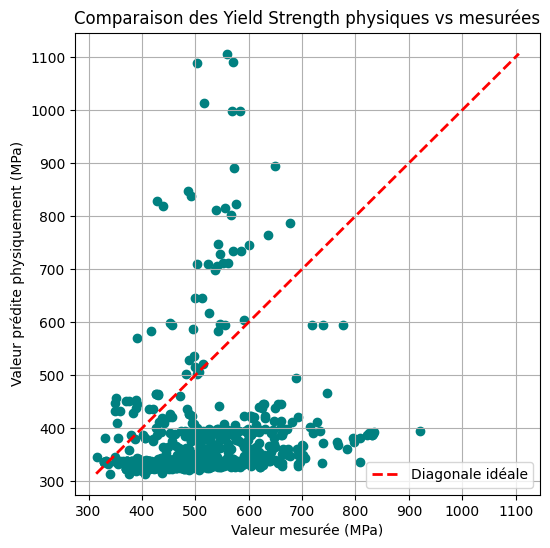

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(df['Yield strength (MPa)'], df['Yield strength (physique)'], color='teal')

# 🔹 Définir les bornes automatiques des axes
min_val = min(df['Yield strength (MPa)'].min(), df['Yield strength (physique)'].min())
max_val = max(df['Yield strength (MPa)'].max(), df['Yield strength (physique)'].max())

# 🔹 Tracer la diagonale rouge (y = x)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Diagonale idéale')

plt.xlabel("Valeur mesurée (MPa)")
plt.ylabel("Valeur prédite physiquement (MPa)")
plt.title("Comparaison des Yield Strength physiques vs mesurées")
plt.legend()
plt.grid(True)
plt.show()


On observe que la plupart des points se situent en dessous de cette diagonale, indiquant une sous-estimation générale des valeurs mesurées par la formule. De plus, la dispersion importante des points montre que cette relation physique ne prend pas en compte l’ensemble des facteurs influençant la résistance du matériau. Ainsi, la formule fournit une tendance globale correcte, mais reste insuffisamment précise, ce qui motive l’utilisation ultérieure de modèles de Machine Learning pour améliorer la prédiction.

**Prédiction de Yield Strength à l’aide du Machine Learning**


Après avoir estimé la Yield Strength à l’aide d’une formule physique, nous allons maintenant utiliser des modèles de Machine Learning pour améliorer la précision des prédictions.
Cette approche permet de prendre en compte un plus grand nombre de variables — composition chimique, paramètres thermiques et caractéristiques de soudage — afin de mieux modéliser les relations complexes entre ces facteurs et la résistance mécanique du matériau.
Le modèle obtenu servira ensuite à prédire les valeurs manquantes de la Yield Strength et à compléter le jeu de données pour les prochaines étapes d’analyse.

On sépare les données complètes et incomplètes

In [12]:
# Données complètes : celles qui ont une valeur mesurée de Yield Strength
df_train = df.dropna(subset=['Yield strength (MPa)'])

# Données incomplètes : celles où la valeur est manquante
df_missing = df[df['Yield strength (MPa)'].isna()]


Ici,on sélectionne les colonnes qui influencent le plus la résistance du métal :

In [13]:
features = [
    'Carbon concentration (weight \\%)',
    'Chromium concentration (weight \\%)',
    'Molybdenum concentration (weight \\%)',
    'Copper concentration (weight \\%)',
    'Heat input (kJ mm$^{-1}$)',
    'Yield strength (physique)'
]



In [14]:
X_train = df_train[features]
y_train = df_train['Yield strength (MPa)']

X_missing = df_missing[features]



Gérer les NaN dans les features (avec imputer)

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_missing = pd.DataFrame(imputer.transform(X_missing), columns=X_missing.columns)


Entraîner un modèle de Machine Learning (Random Forest)

In [18]:
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [20]:
y_pred = model.predict(X_test_split)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_split, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))
r2 = r2_score(y_test_split, y_pred)

print(f"MAE  : {mae:.2f} MPa")
print(f"RMSE : {rmse:.2f} MPa")
print(f"R²   : {r2:.3f}")


MAE  : 26.43 MPa
RMSE : 38.38 MPa
R²   : 0.837


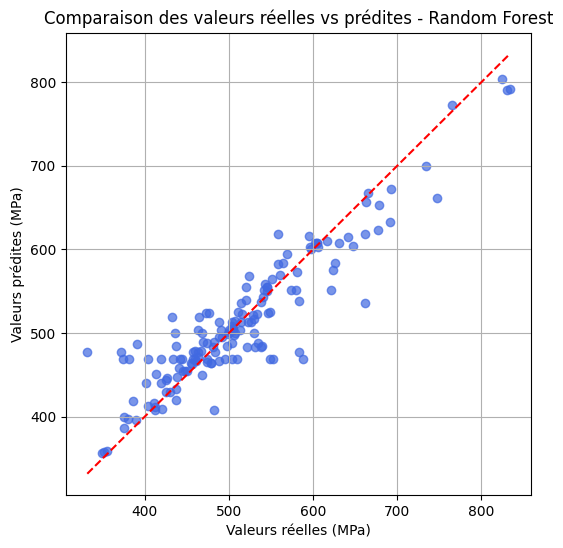

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_split, y_pred, color='royalblue', alpha=0.7)
plt.plot([y_test_split.min(), y_test_split.max()], [y_test_split.min(), y_test_split.max()], 'r--')
plt.xlabel("Valeurs réelles (MPa)")
plt.ylabel("Valeurs prédites (MPa)")
plt.title("Comparaison des valeurs réelles vs prédites - Random Forest")
plt.grid(True)
plt.show()


On prédit les valeurs manquantes

In [23]:
y_pred_missing = model.predict(X_missing)


On remplace les valeurs manquantes par les prédictions

In [24]:
df.loc[df['Yield strength (MPa)'].isna(), 'Yield strength (MPa)'] = y_pred_missing


In [26]:
df.to_csv("weld_data_yield_strength_predicted_ML", index=False)


In [28]:
df['Yield strength (MPa)'].isna().sum()


np.int64(0)

In [27]:
df['Yield strength (MPa)'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1652 entries, 0 to 1651
Series name: Yield strength (MPa)
Non-Null Count  Dtype  
--------------  -----  
1652 non-null   float64
dtypes: float64(1)
memory usage: 13.0 KB
